In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Choose expiry date

In [2]:
expiry='2022-08-09'

Request SPX call options expiring on the given date

In [3]:
spx = yf.Ticker("^SPX")
opt = spx.option_chain(date=expiry)
#opt.calls

Request the spot price of the index

In [4]:
spot = spx.info['regularMarketPrice']

In [5]:
spot

4140.06

In [36]:
given_calls = opt.calls
given_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW220809C01000000,2022-08-08 18:49:04+00:00,1000.0,3134.70,3148.8,3151.80,0.0,0.0,2.0,0,13.293947,True,REGULAR,USD
1,SPXW220809C01200000,2022-08-05 19:31:24+00:00,1200.0,2935.32,2948.8,2951.80,0.0,0.0,1.0,0,11.650393,True,REGULAR,USD
2,SPXW220809C03150000,2022-08-08 19:26:12+00:00,3150.0,989.70,989.4,992.60,0.0,0.0,2.0,0,2.130864,True,REGULAR,USD
3,SPXW220809C03450000,2022-08-08 19:38:41+00:00,3450.0,689.80,689.4,692.60,0.0,0.0,2.0,0,1.484866,True,REGULAR,USD
4,SPXW220809C03550000,2022-08-08 18:41:48+00:00,3550.0,587.50,589.6,592.60,0.0,0.0,2.0,0,1.294437,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,SPXW220809C04400000,2022-08-08 15:32:50+00:00,4400.0,0.05,0.0,0.00,0.0,0.0,3.0,0,0.250007,False,REGULAR,USD
121,SPXW220809C04425000,2022-08-04 19:49:13+00:00,4425.0,0.05,0.0,0.00,0.0,0.0,NaN,0,0.250007,False,REGULAR,USD
122,SPXW220809C04450000,2022-08-08 19:56:02+00:00,4450.0,0.05,0.0,0.05,0.0,0.0,1.0,0,0.468755,False,REGULAR,USD
123,SPXW220809C04500000,2022-08-04 19:53:25+00:00,4500.0,0.05,0.0,0.00,0.0,0.0,6050.0,0,0.250007,False,REGULAR,USD


In [37]:
given_puts = given_puts.iloc[:, np.r_[2,5]]
given_puts

,strike,ask
0,1000.0,3151.80
1,1200.0,2951.80
2,3150.0,992.60
3,3450.0,692.60
4,3550.0,592.60
...,...,...
120,4400.0,0.00
121,4425.0,0.00
122,4450.0,0.05
123,4500.0,0.00


Extract the strike price and the price of each call

In [39]:
given_calls = given_calls.iloc[3:,:]
given_calls.head()

,strike,ask
3,3450.0,692.6
4,3550.0,592.6
5,3625.0,517.6
6,3680.0,462.6
7,3700.0,442.6


In [66]:
x = given_calls['strike'].to_numpy()
y = given_calls['ask'].to_numpy()

In [67]:
from scipy import interpolate
tck = interpolate.UnivariateSpline(x, y)
xnew = np.arange(given_calls.iloc[0,0], given_calls.iloc[-1,0], 0.01)
ynew = tck(xnew)

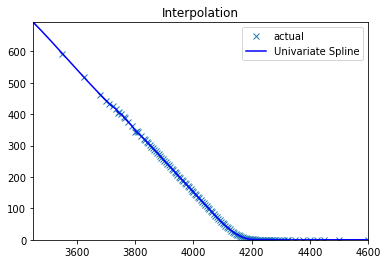

In [68]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew , 'b')
plt.legend(['actual', 'Univariate Spline'])
plt.axis([given_calls.iloc[0,0], given_calls.iloc[-1,0], given_calls.iloc[-1,1], given_calls.iloc[0,1]])
plt.title('Interpolation')
plt.show()

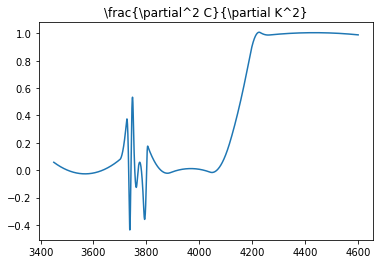

In [71]:
ckk = [tck.derivatives(i)[1]+1 for i in xnew]
plt.figure()
plt.plot(xnew, ckk)
plt.title(r'\frac{\partial^2 C}{\partial K^2}')
plt.show()

# With Puts

In [89]:
given_puts = opt.puts
given_puts = given_puts.iloc[:, np.r_[2,5]]
given_puts = given_puts.iloc[:-20,:]
given_puts

,strike,ask
0,1600.0,0.05
1,2200.0,0.05
2,2400.0,0.05
3,2600.0,0.05
4,2800.0,0.05
...,...,...
129,4225.0,76.50
130,4230.0,81.40
131,4235.0,86.40
132,4240.0,91.30


In [90]:
given_puts.tail(15)

,strike,ask
119,4175.0,31.8
120,4180.0,35.4
121,4185.0,39.2
122,4190.0,43.8
123,4195.0,48.1
124,4200.0,52.7
125,4205.0,57.3
126,4210.0,62.0
127,4215.0,66.8
128,4220.0,71.8


In [94]:
x = given_puts['strike'].to_numpy()
y = given_puts['ask'].to_numpy()
tck = interpolate.UnivariateSpline(x, y)
xnew = np.arange(given_puts.iloc[0,0], given_puts.iloc[-1,0], 0.001)
ynew = tck(xnew)

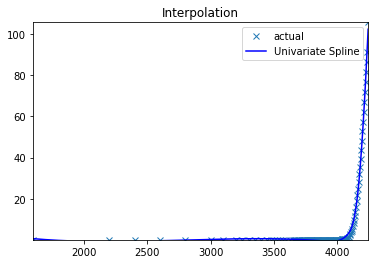

In [95]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew , 'b')
plt.legend(['actual', 'Univariate Spline'])
plt.axis([given_puts.iloc[0,0], given_puts.iloc[-1,0], given_puts.iloc[0,1], given_puts.iloc[-1,1]])
plt.title('Interpolation')
plt.show()

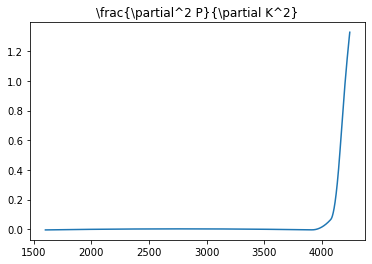

In [96]:
pk = [tck.derivatives(i)[1] for i in xnew]
plt.figure()
plt.plot(xnew, pk)
plt.title(r'\frac{\partial^2 P}{\partial K^2}')
plt.show()